In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
report_df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


In [6]:
# only want report from 2019
BM = report_df.year == 2019
report_2019_df = report_df[BM]
report_2019_df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
9,Afghanistan,Asia,2019,38041754.0,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
19,Albania,Europe,2019,2854191.0,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274
29,Algeria,Africa,2019,43053054.0,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215
39,Argentina,South America,2019,44938712.0,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319
49,Armenia,Europe,2019,2957731.0,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430


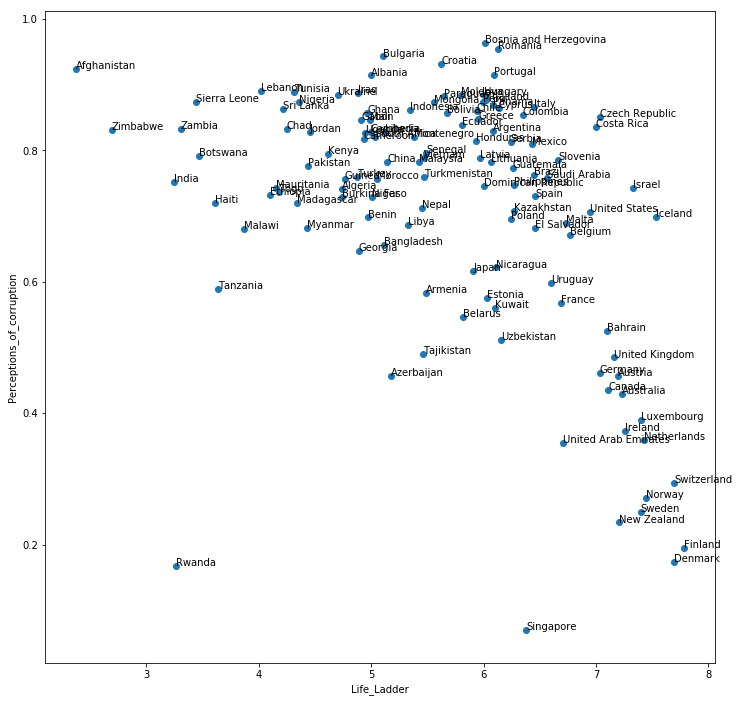

In [12]:
# scatter plot
plt.figure(figsize=(12,12))
plt.scatter(report_2019_df['Life_Ladder'], report_2019_df['Perceptions_of_corruption'])
for _, row in report_2019_df.iterrows():
    plt.annotate(row.Name, (row.Life_Ladder, row.Perceptions_of_corruption))
plt.xlabel('Life_Ladder')
plt.ylabel('Perceptions_of_corruption')
plt.show()

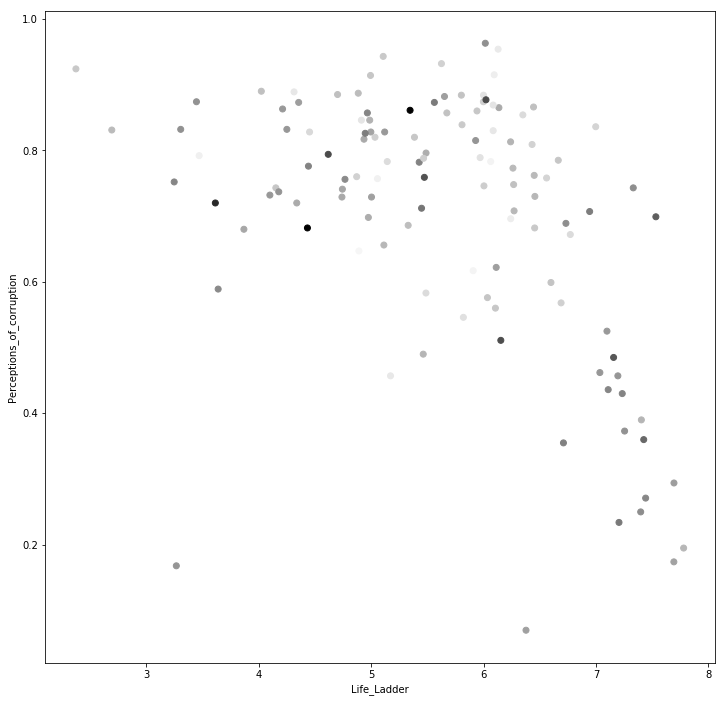

In [15]:
# scattering for 3 dimensional attributes(more than 2 attributes)
# here the 3rd attribute is represented by color. The lighter the mark, lower the score
plt.figure(figsize=(12,12))
plt.scatter(report_2019_df['Life_Ladder'], report_2019_df['Perceptions_of_corruption'],
            c= report_2019_df['Generosity'], cmap='binary')
plt.xlabel('Life_Ladder')
plt.ylabel('Perceptions_of_corruption')
plt.show()

#### K-Means Algorithm

In [16]:
# the algorithm starts by randomly selecting k data objects as the cluster centroids.
# Then, the data objects are assigned to the cluster that is closest to its centroid. 
# Next, the centroids are updated via the mean of all the data objects in the clusters. 
# As the centroids are updated, the data objects are reassigned to the cluster that is closest to its centroid. 
# Now, as the clusters are updated, the centroids will be updated as the mean of all the new data objects in the clusters. 
# These last two steps keep occurring until there is no change in the cluster after updating the centroids. 
# Once this stability has been reached, the algorithm terminates.

In [17]:
from sklearn.cluster import KMeans

In [19]:
dimensions = ['Life_Ladder', 'Perceptions_of_corruption']
X = report_2019_df[dimensions]

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
print(kmeans.labels_)
for i in range(6):
    BM = kmeans.labels_ == i
    print('Cluster {} :{}'.format(i, report_2019_df[BM].Name.values))

[0 2 2 3 2 4 4 2 4 2 3 1 2 3 3 0 1 2 2 2 2 4 5 3 2 1 1 3 3 1 4 3 3 1 3 5 4
 1 2 2 4 2 3 3 2 0 3 3 4 0 2 2 4 4 1 3 5 3 5 3 3 5 2 2 3 4 5 5 2 2 1 5 1 3
 3 2 2 5 2 4 4 3 2 5 4 5 3 3 3 3 3 3 3 0 1 2 3 0 1 1 2 1 5 4 4 2 0 3 5 5 2
 2 2 2 1 4 1 1 3 2 0 0]
Cluster 0 :['Afghanistan' 'Botswana' 'Haiti' 'India' 'Rwanda' 'Sierra Leone'
 'Tanzania' 'Zambia' 'Zimbabwe']
Cluster 1 :['Belgium' 'Brazil' 'Colombia' 'Costa Rica' 'Czech Republic' 'El Salvador'
 'France' 'Italy' 'Malta' 'Mexico' 'Saudi Arabia' 'Singapore' 'Slovenia'
 'Spain' 'United Arab Emirates' 'United States' 'Uruguay']
Cluster 2 :['Albania' 'Algeria' 'Armenia' 'Azerbaijan' 'Bangladesh' 'Benin'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon' 'China' 'Gabon' 'Georgia'
 'Ghana' 'Guinea' 'Indonesia' 'Iraq' 'Liberia' 'Libya' 'Malaysia' 'Mali'
 'Montenegro' 'Morocco' 'Nepal' 'Niger' 'Senegal' 'South Africa'
 'Tajikistan' 'Turkey' 'Turkmenistan' 'Uganda' 'Ukraine' 'Vietnam']
Cluster 3 :['Argentina' 'Belarus' 'Bolivia' 'Bosnia and Herzegovin

In [28]:
# always normalize when using distance based algorithm
dimensions = ['Life_Ladder', 'Perceptions_of_corruption']
X = report_2019_df[dimensions]
X = (X - X.min()) / (X.max() - X.min())
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

for i in range(6):
    BM = kmeans.labels_ == i
    print('Cluster {} :{}'.format(i, report_2019_df[BM].Name.values))

Cluster 0 :['Albania' 'Algeria' 'Bangladesh' 'Benin' 'Bulgaria' 'Burkina Faso'
 'Cambodia' 'Cameroon' 'China' 'Gabon' 'Georgia' 'Ghana' 'Guinea'
 'Indonesia' 'Iraq' 'Jordan' 'Kenya' 'Liberia' 'Libya' 'Madagascar'
 'Malaysia' 'Mali' 'Montenegro' 'Morocco' 'Myanmar' 'Nepal' 'Niger'
 'Pakistan' 'Senegal' 'South Africa' 'Turkey' 'Turkmenistan' 'Uganda'
 'Ukraine' 'Vietnam']
Cluster 1 :['Australia' 'Austria' 'Canada' 'Denmark' 'Finland' 'Germany' 'Ireland'
 'Luxembourg' 'Netherlands' 'New Zealand' 'Norway' 'Singapore' 'Sweden'
 'Switzerland' 'United Arab Emirates' 'United Kingdom']
Cluster 2 :['Argentina' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Chile'
 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Dominican Republic' 'Ecuador' 'Greece' 'Guatemala' 'Honduras' 'Hungary'
 'Italy' 'Latvia' 'Lithuania' 'Mexico' 'Moldova' 'Mongolia' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Portugal' 'Romania' 'Saudi Arabia'
 'Serbia' 'Slovenia' 'Thailand']
Cluster 3 :['Armenia' 'Azerbaijan'

#### K-Means clustering for more than two dimensions

In [32]:
dimensions = [ 'Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices', 'Generosity',
'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect']

X = report_2019_df[dimensions]
X = (X - X.min()) / (X.max() - X.min())

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

for i in range(3):
    BM = kmeans.labels_==i
    print('Cluster {}: {}' .format(i,report_2019_df[BM].Name.values))

Cluster 0: ['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Belarus'
 'Belgium' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Dominican Republic' 'Ecuador' 'El Salvador' 'Georgia'
 'Greece' 'Guatemala' 'Honduras' 'Hungary' 'Indonesia' 'Israel' 'Italy'
 'Japan' 'Kazakhstan' 'Kuwait' 'Latvia' 'Libya' 'Lithuania' 'Malaysia'
 'Malta' 'Mexico' 'Moldova' 'Mongolia' 'Montenegro' 'Nicaragua' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Romania'
 'Saudi Arabia' 'Serbia' 'Slovenia' 'South Africa' 'Spain' 'Sri Lanka'
 'Tajikistan' 'Thailand' 'Turkey' 'Turkmenistan' 'Ukraine' 'Vietnam']
Cluster 1: ['Afghanistan' 'Bangladesh' 'Benin' 'Burkina Faso' 'Cambodia' 'Cameroon'
 'Chad' 'Ethiopia' 'Gabon' 'Ghana' 'Guinea' 'Haiti' 'India' 'Iraq'
 'Jordan' 'Kenya' 'Lebanon' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Morocco' 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Pakistan'
 'Rw

#### Centroid Analysis

In [33]:
import seaborn as sns

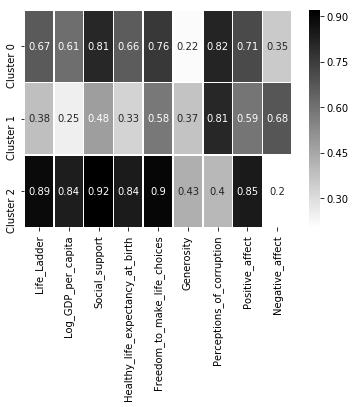

In [41]:
clusters = ['Cluster {}'.format(i) for i in range(3)]
Centroids = pd.DataFrame(0.0, index = clusters, columns = X.columns)
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    Centroids.loc[clst] = X[BM].median(axis=0)
sns.heatmap(Centroids, linewidths=.5, annot=True, cmap='binary')
plt.show()